# **Crash Course in Generative AI Worked Example**

### **Chinmay Mahesh Deshpande**  
**Topic:** Generative Adversarial Networks (GANs) for Data Augmentation  
**Dataset:** Adult Income Dataset (UCI Census)

---

## Abstract

This notebook explores the use of Generative Adversarial Networks (GANs) for data augmentation on the Adult Income dataset, a well-known benchmark in socio-economic modeling. The project begins with a comprehensive overview of Generative AI, its foundational models, and the theoretical evolution that brought forth adversarial learning. GANs are then employed to synthesize tabular data that closely mirrors the distribution of real-world census records.

The approach involves training a generator-discriminator pair on normalized features such as age, education level, hours worked, and income class. Through iterative training and adversarial feedback, the generator learns to create plausible synthetic profiles. Visual and quantitative evaluations using kernel density plots and Jensen-Shannon divergence are used to compare real and synthetic data distributions.

This notebook demonstrates how GANs can serve as a tool for privacy-preserving data simulation, class balancing, and generative augmentation in tabular machine learning pipelines.


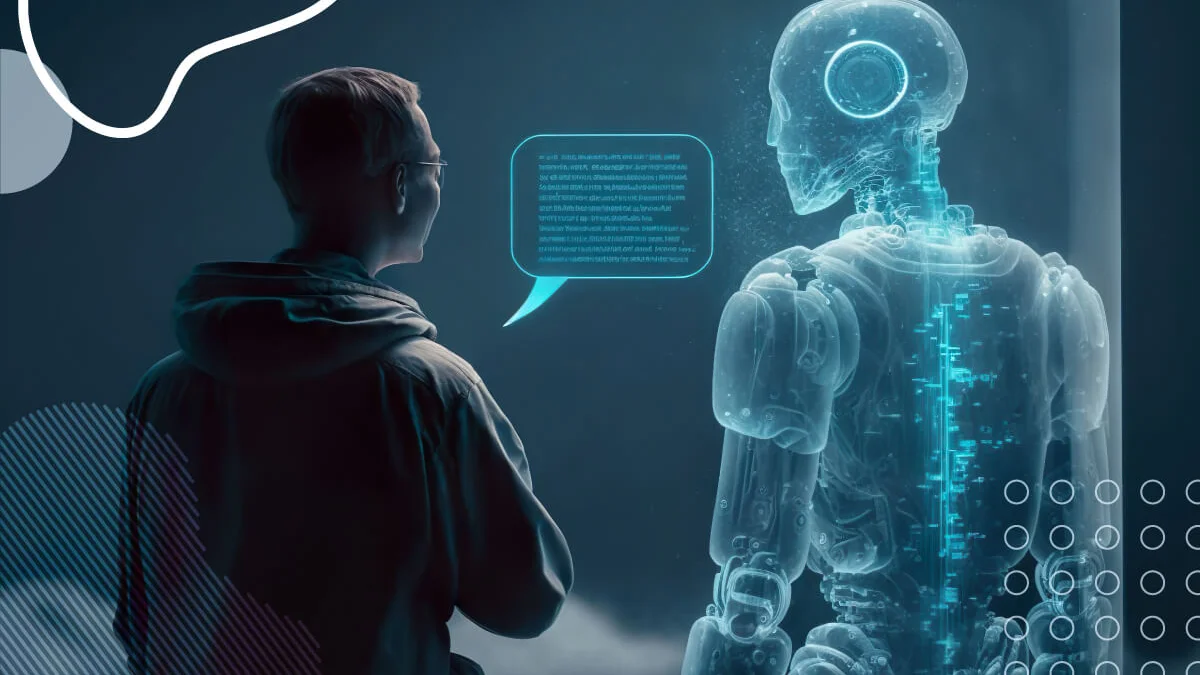

# Introduction to Generative AI

Generative Artificial Intelligence (Generative AI or Gen AI) represents a significant advancement in machine learning, focusing not just on recognizing patterns in existing data, but on **creating new data** that mimics the structure and distribution of real-world information.

In traditional machine learning, models are trained to classify, predict, or cluster based on provided inputs. Generative AI shifts this paradigm by enabling machines to synthesize content — whether that’s text, images, audio, or structured records — based on learned data distributions.

In this project, we apply Generative AI to **tabular data**, specifically the **Adult Income Dataset**, to generate new synthetic census records. The objective is to explore how GANs can simulate realistic socio-economic profiles by learning the statistical properties of features like age, hours worked, education, and income level.

Generative AI models such as **GANs**, **VAEs**, and **Diffusion Models** are transforming how we handle small or imbalanced datasets, privacy-sensitive scenarios, and simulation-based modeling — especially in fields like healthcare, finance, and government.


# Discriminative vs. Generative Modeling

To understand the significance of generative AI, it’s important to contrast it with **discriminative modeling**, the foundation of many traditional supervised learning tasks.

### Discriminative Models
Discriminative models focus on **decision boundaries** — learning to classify input data into predefined categories. For example, in the Adult Income dataset, a discriminative model would predict whether an individual earns `>50K` or `<=50K` based on features like age, education, and hours-per-week.

These models learn conditional probabilities:  
\[
P(y \mid X)
\]
Where `y` is the label (income class), and `X` is the feature vector.

### Generative Models
In contrast, generative models try to **model the actual data distribution** — not just the decision boundary. GANs aim to understand and replicate the joint probability:
\[
P(X)
\]
This enables the generation of **new samples** that look like they could have come from the original dataset.

In this notebook, we apply a generative model (GAN) to synthesize plausible adult income records — not just to classify them, but to **generate them from scratch**, making this a powerful tool for data augmentation and simulation.


# Evolution of Generative AI and Its Role in Structured Data

Generative AI began with foundational concepts in probabilistic modeling and evolved rapidly with the rise of deep learning. While early techniques like **Naive Bayes**, **Hidden Markov Models**, and **Mixture Models** introduced the idea of learning data distributions, the emergence of deep neural networks enabled a quantum leap in generative capabilities.

### Key Milestones in Generative AI:

- **Autoencoders (2011–2014):** Neural networks trained to compress and reconstruct data. These were the first to map inputs to latent representations.
- **Variational Autoencoders (VAEs):** Introduced probabilistic reasoning into autoencoders, enabling the generation of new samples from learned latent spaces.
- **Generative Adversarial Networks (GANs, 2014):** Revolutionized generation by pitting two networks — a generator and a discriminator — against each other in a zero-sum game.
- **Autoregressive Models (2017+):** Models like GPT used next-token prediction to generate fluent, coherent sequences.
- **Diffusion Models (2021+):** State-of-the-art image generators that model noise reversal in pixel space.

While most generative breakthroughs began in image and text domains, their applications have now expanded into **structured data generation** — from financial records to healthcare logs to census data. In this project, we apply GANs to **simulate realistic demographic and employment profiles** based on the Adult Income dataset.

### Why Structured Data Matters

Unlike images or language, tabular data presents unique challenges for generative modeling:
- Features have mixed data types (numerical + categorical)
- Relationships are often non-linear and domain-specific
- Realism and plausibility are harder to judge visually

Despite this, generative AI — especially GANs — offers powerful tools for:
- Augmenting small or imbalanced datasets
- Generating synthetic data for privacy-sensitive use cases
- Enhancing training for downstream models

This project focuses on these real-world benefits by applying GANs to one of the most widely used public tabular datasets in machine learning.


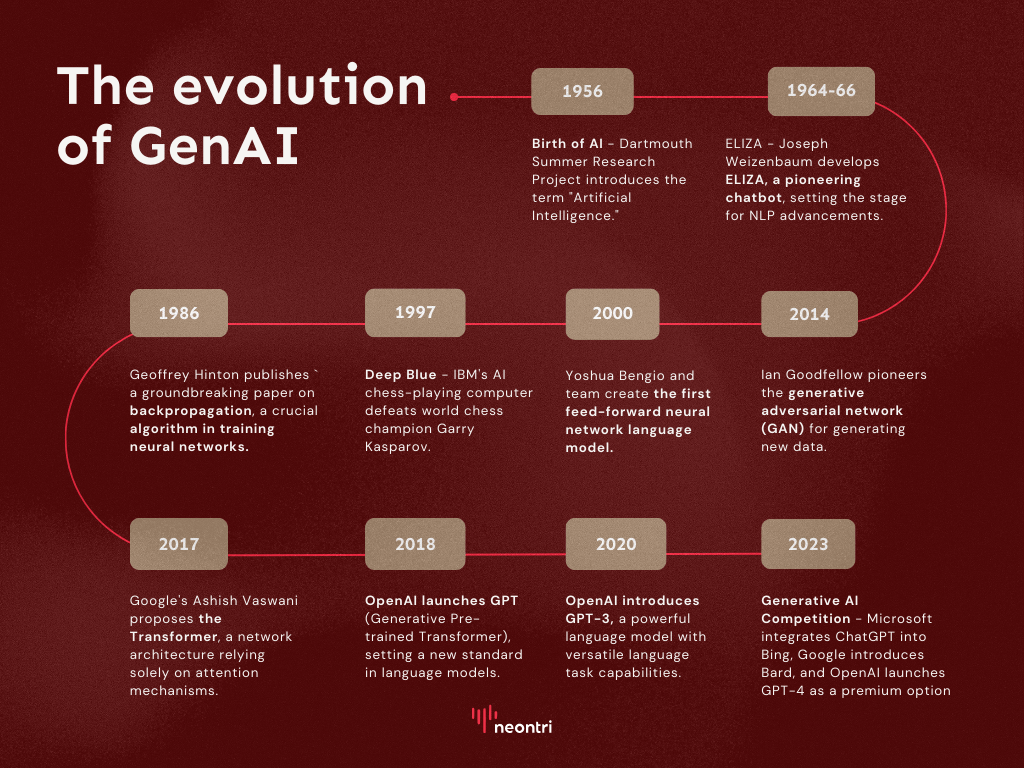

# Challenges of Applying GANs to Tabular Data

While GANs have revolutionized image and text generation, applying them to **tabular datasets** presents a unique set of challenges that go beyond pixel interpolation or token prediction.

### 1. Mixed Data Types
Tabular data typically includes:
- **Numerical features**: e.g., age, hours-per-week, capital-gain
- **Categorical features**: e.g., education, occupation, relationship
GANs must model both types accurately — often requiring different preprocessing, loss functions, or generation strategies.

### 2. Imbalanced Distributions
Some values (like "Private" in `workclass` or "<=50K" in `income`) may dominate. This can cause the generator to **mode-collapse**, producing only frequent patterns while ignoring rare but valid samples.

### 3. Semantic Integrity
Tabular data has **rules and dependencies**. For example:
- A person with a PhD is unlikely to be 17 years old.
- "Self-employed" people might not belong to a "Private" workclass.
GANs must learn these constraints implicitly, which is harder than in vision or language, where realism is often visual or grammatical.

### 4. Evaluation Difficulty
Unlike image generation, where visual fidelity can be inspected, tabular generation lacks intuitive human evaluation. This makes **quantitative metrics** essential — such as JS Divergence, correlation structure preservation, and classifier utility.

These challenges make structured data a frontier domain for generative models — but also one with high practical value, especially in regulated or data-scarce environments.


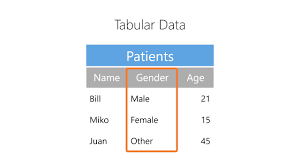

# How GANs Handle Mixed Data Types in Tabular Datasets

Unlike image or text data, **tabular datasets** often consist of a mix of:
- **Continuous (numerical)** variables like age or hours-per-week
- **Categorical** variables like education or marital status
- **Ordinal** variables like education-num that have ordered levels

Handling these data types properly is critical to generating **valid and useful synthetic records**.

---

### 1. Encoding Categorical Features

Most GAN architectures work on numerical tensors, so categorical variables must be **encoded** before training.

**Common approaches:**
- **One-Hot Encoding**: Expands each category into binary columns. Simple but can explode dimensionality.
- **Label Encoding**: Assigns a unique integer to each category. Easy but imposes an artificial order.
- **Embedding Layers** (advanced): Learn distributed vector representations of categories. Useful when training large GANs.

---

### 2. Output Decoding: From Continuous Back to Category

After generating synthetic data:
- The GAN’s output for categorical columns is typically **a set of probabilities or scores** (especially if one-hot encoded).
- A common decoding method is to take the **argmax** over the one-hot vector to retrieve the predicted category.

---

### 3. Data Type Conditioning

Some advanced GANs (like CTGAN) introduce:
- **Conditional Vectors**: Used to force the generator to output data in a specific category (e.g., “only generate people who earn >50K”).
- **Mode-specific Normalization**: Normalizes continuous features within category groups.

---

### 4. Common Pitfalls

| Problem                         | Impact                                            | Fix                                 |
|----------------------------------|----------------------------------------------------|--------------------------------------|
| Treating categories as numbers   | Generates invalid ordinal assumptions              | Use one-hot or embeddings            |
| No postprocessing on GAN output  | Fuzzy, non-integer or out-of-range values          | Use argmax, rounding, clipping       |
| Mode collapse on rare classes    | Generator ignores low-frequency categories         | Use conditional GANs or upsampling   |

---

### Why This Matters

To truly replace or augment structured data using GANs, the generator must not just mimic distributions — it must **respect relationships and data types**. These encoding-decoding pipelines are the glue that binds raw data to generative modeling.


# GAN Variants for Structured and Tabular Data

Standard GANs were designed for continuous input spaces like images, which makes them poorly suited for structured tabular data without major modifications. To address this, several GAN architectures have been developed to handle **mixed-type, discrete, and domain-constrained data**.

---

### 1. CTGAN (Conditional Tabular GAN)

**Paper**: [Xu et al., NeurIPS 2019](https://arxiv.org/abs/1907.00503)

CTGAN is specifically designed to model tabular data by addressing key challenges like:
- Imbalanced categorical distributions
- Mode collapse on low-frequency classes
- Conditioning on discrete variables during generation

**Key Innovations:**
- **Conditional sampling**: Each training sample is conditioned on a randomly chosen categorical column.
- **Mode-specific normalization**: Continuous variables are normalized within each category.
- **Training-by-sampling**: Smart sampling strategy improves learning from underrepresented groups.

**Use Case:** Ideal for generating synthetic rows in business, health, or census datasets.

---

### 2. TableGAN

**Paper**: [Park et al., IEEE Big Data 2018](https://ieeexplore.ieee.org/document/8622465)

TableGAN applies convolutional layers (typically used for images) to reshaped tabular data. Though not as interpretable, it shows promising results on small tables.

**Key Features:**
- Incorporates auxiliary classifiers (AC-GAN style) to better learn class distributions.
- Allows downstream task evaluation (e.g., classification accuracy on synthetic data).

**Limitation:** Not optimal for high-cardinality categorical data.

---

### 3. TVAE (Tabular Variational Autoencoder)

**Paper**: Same authors as CTGAN (via SDV library)

TVAE isn’t technically a GAN — it's a **probabilistic autoencoder**. But it shares the same goal: generate realistic tabular samples.

**Advantages:**
- Better performance on small datasets
- Explicit modeling of feature correlations
- Easier to train and evaluate than GANs

**Tradeoff:** May lack diversity or sharpness in edge-case generation.

---

### 4. CopulaGAN (Hybrid)

A newer approach combining **copula-based dependency modeling** with GANs. Learns statistical dependencies more explicitly while leveraging generative modeling power.

---

### Summary Table

| Model       | Best For                         | Strengths                             | Weaknesses                            |
|-------------|----------------------------------|----------------------------------------|----------------------------------------|
| **CTGAN**   | Tabular data with imbalance      | Mode-specific normalization, conditional generation | Slower training, requires tuning       |
| **TVAE**    | Smaller datasets, mixed types    | Stable, interpretable latent space     | Not a GAN (lower diversity)            |
| **TableGAN**| Dense tables with known structure| Auxiliary classifiers, good for tasks  | Less effective for complex categories  |
| **CopulaGAN**| Modeling dependencies directly  | Preserves column relationships         | Newer, less community support          |

---

These models form the foundation of **SDV (Synthetic Data Vault)** — a popular open-source library for generating high-quality tabular synthetic data.

In this notebook, we’ll proceed by implementing a **basic GAN from scratch**, to understand the core learning mechanics before moving to advanced variants.


# Project Focus: GANs for Data Augmentation on the Adult Income Dataset

This project applies **Generative Adversarial Networks (GANs)** to the **Adult Income Dataset** — a classic benchmark for socio-economic modeling. The goal is to explore how GANs can generate synthetic, realistic demographic records that can be used for **data augmentation**, **privacy-preserving simulation**, and **bias analysis**.

---

## Why This Dataset?

The Adult Income dataset (also known as the Census Income dataset) contains information about individuals from the 1994 U.S. Census. It includes both **numerical** and **categorical** variables such as:

- `age`, `education-num`, `hours-per-week`, `capital-gain`, `capital-loss` (numerical)
- `workclass`, `education`, `marital-status`, `occupation`, `relationship`, `race`, `sex` (categorical)
- Target variable: `income` (binary classification: `<=50K` or `>50K`)

This makes it an ideal dataset to test generative models that can handle:
- Mixed data types
- Real-world constraints (e.g., job types and education levels)
- Imbalanced labels (the `>50K` class is underrepresented)

---

## Why Use GANs Here?

While traditional classifiers are often trained directly on this dataset, they may suffer from:
- **Class imbalance**: Only ~24% of individuals earn `>50K`
- **Privacy concerns**: If used in production, real census data may not be shareable
- **Lack of diversity in training samples**: Certain profiles may be underrepresented

GANs offer a powerful way to address these issues:

###  Data Augmentation:
Generate additional synthetic records to:
- Upsample underrepresented income groups
- Simulate balanced datasets
- Improve generalization of downstream classifiers

###  Privacy-Preserving Simulation:
Synthetic data mimics the statistical properties of real data — useful for building and sharing datasets without exposing sensitive personal information.

###  AI Explainability + Fairness Audits:
By simulating thousands of profiles with slight variations, we can analyze how changes in features like race, education, or gender impact predicted income — a key tool in fairness-aware ML.

---

## What This Notebook Will Demonstrate

- How to preprocess a mixed-type tabular dataset for GAN training
- How to design and train a simple GAN to generate realistic adult profiles
- How to evaluate generated samples both **visually** and **quantitatively**
- How GANs can be used for **smart, interpretable data augmentation** in real-world socio-economic modeling

This project ties theory and application together, showing how Generative AI — once confined to images and text — is now transforming structured data pipelines.


# Dataset Description

This project uses the **Adult Income Dataset** (also known as the **Census Income Dataset**), a publicly available dataset from the UCI Machine Learning Repository, also hosted on Kaggle. It contains demographic and employment-related information about individuals, and the task is to predict whether a person earns more than `$50K` annually.

**Dataset Link:**  
[https://www.kaggle.com/datasets/uciml/adult-census-income](https://www.kaggle.com/datasets/uciml/adult-census-income)

---

## Features

The dataset includes **14 input attributes** and **1 binary target attribute** (`income`):

### Numerical Features:
- `age`: Age of the individual
- `fnlwgt`: Final weight (census sampling variable)
- `education-num`: Education level (as an ordinal integer)
- `capital-gain`: Income from capital gains
- `capital-loss`: Losses from capital
- `hours-per-week`: Hours worked per week

### Categorical Features:
- `workclass`: Type of employment (e.g., Private, Self-employed)
- `education`: Education level (e.g., Bachelors, HS-grad)
- `marital-status`: Marital status
- `occupation`: Type of job (e.g., Tech-support, Sales)
- `relationship`: Relationship status (e.g., Husband, Not-in-family)
- `race`: Race (e.g., White, Black)
- `sex`: Gender
- `native-country`: Country of origin

### Target Feature:
- `income`: Binary label — `<=50K` or `>50K`

---

## Use in This Project

For this GAN project, we will:
- Select a subset of **numerical features** to simplify the architecture and demonstrate the generative process.
- Normalize the data for stable GAN training.
- Later expand to include **categorical handling** with encoding strategies.

The Adult Income Dataset provides a rich, interpretable structure that is ideal for demonstrating the power of GANs in **structured data augmentation and simulation**.


In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


url = "https://raw.githubusercontent.com/chinm4y/Datasets/refs/heads/main/adult.csv"
df = pd.read_csv(url)


In [13]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [14]:
df.columns = df.columns.str.strip()

# Display actual column names to confirm
print(df.columns.tolist())



['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']


In [15]:
numeric_features = [
    'age',
    'fnlwgt',
    'education.num',
    'capital.gain',
    'capital.loss',
    'hours.per.week'
]

gan_df = df[numeric_features]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(gan_df)


## Feature Distributions (Real Data)

The KDE plots above visualize the distribution of the selected numerical features from the Adult Income dataset. These include:

- `age`: The age of the individual
- `fnlwgt`: Final weight, a census variable related to sampling
- `education-num`: Encoded education level
- `capital-gain` / `capital-loss`: Income-related financial indicators
- `hours-per-week`: Hours worked per week

Understanding the distributions helps guide the generator's learning process and reveals challenges like skewness, sparsity (e.g., capital-gain/loss), and outlier behavior — all of which impact GAN convergence and sample diversity.


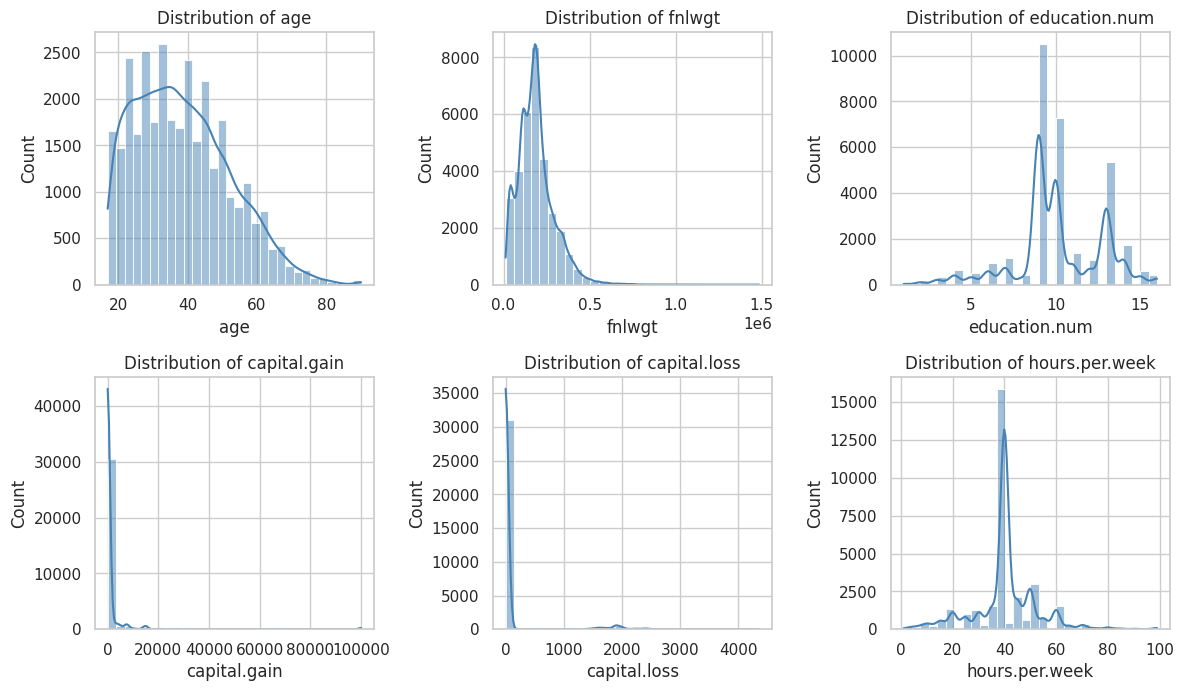

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use original, unscaled values for better interpretability in plots
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")

for i, column in enumerate(gan_df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(gan_df[column], bins=30, kde=True, color='steelblue')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()


## GAN Architecture: Generator and Discriminator

This GAN is composed of two fully connected neural networks:

### Generator

- Takes a **latent noise vector** as input and learns to generate synthetic tabular data that mimics the real feature space.
- Uses **LeakyReLU** activations and **BatchNormalization** to stabilize learning.
- Outputs normalized values (between 0 and 1) for each feature.

### Discriminator

- Takes a real or synthetic sample and tries to classify it as real or fake.
- Uses **LeakyReLU**, **Dropout**, and a **sigmoid** output to compute a binary probability.
- Its role is to act as an adversary to the generator — improving its discrimination skill as the generator improves its mimicry.

Together, these two models engage in adversarial training, gradually improving until the generator produces data indistinguishable from real census records.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Input

def build_generator(latent_dim, output_dim):
    model = Sequential()
    model.add(Input(shape=(latent_dim,)))
    model.add(Dense(128))
    model.add(LeakyReLU(negative_slope=0.2))
    model.add(BatchNormalization())

    model.add(Dense(256))
    model.add(LeakyReLU(negative_slope=0.2))
    model.add(BatchNormalization())

    model.add(Dense(output_dim, activation='sigmoid'))  # output is scaled between 0 and 1
    return model


In [19]:
from tensorflow.keras.layers import Dropout

def build_discriminator(input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(256))
    model.add(LeakyReLU(negative_slope=0.2))
    model.add(Dropout(0.3))

    model.add(Dense(128))
    model.add(LeakyReLU(negative_slope=0.2))
    model.add(Dropout(0.3))

    model.add(Dense(1, activation='sigmoid'))  # binary output: real or fake
    return model


## Model Compilation and GAN Assembly

### Discriminator Compilation

The **discriminator** is compiled first, using:
- **Binary Crossentropy** loss, suitable for binary classification (real vs. fake)
- **Adam optimizer** with a learning rate of `0.0002` and momentum term `β₁ = 0.5` — a common configuration for stable GAN training

### Combined GAN Model

After the discriminator is compiled:
- Its weights are **frozen** so that only the generator is updated during GAN training.
- The generator and discriminator are stacked into a single **sequential GAN model**.

This setup allows the generator to receive gradient updates **indirectly** from the discriminator's output, pushing it to produce more realistic samples in order to "fool" the discriminator.


In [20]:
from tensorflow.keras.optimizers import Adam

latent_dim = 32  # dimension of the input noise vector
input_dim = scaled_data.shape[1]  # number of features (columns)

# Initialize models
generator = build_generator(latent_dim, input_dim)
discriminator = build_discriminator(input_dim)

# Compile discriminator
optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [21]:
# Freeze discriminator weights during generator training
discriminator.trainable = False

# Stack generator and discriminator to build GAN
gan_model = Sequential()
gan_model.add(generator)
gan_model.add(discriminator)

# Compile GAN model
gan_model.compile(loss='binary_crossentropy', optimizer=optimizer)


## GAN Training: 500 Epochs

The GAN is trained over 500 epochs using a batch size of 32.

### Training Loop

Each iteration includes two updates:
1. **Discriminator Training**
   - Trained on real data (`valid`) and synthetic data (`fake`) separately
   - Losses are averaged for balanced feedback

2. **Generator Training**
   - The generator is updated based on its ability to fool the discriminator
   - Trained to produce data that the discriminator classifies as real (`valid`)

### Labels
- `valid` = real data label (1)
- `fake` = generated data label (0)

### Logging
Every 100 epochs, losses and discriminator accuracy are printed to monitor progress. The goal is to reach a balance where the discriminator has ~50% accuracy — meaning it can’t easily tell real from fake data.


In [22]:
import numpy as np

epochs = 500
batch_size = 32
sample_interval = 100

valid = np.ones((batch_size, 1))  # labels for real data
fake = np.zeros((batch_size, 1))  # labels for generated data

d_losses = []
g_losses = []

for epoch in range(epochs):

    # ---------------------
    #  Train Discriminator
    # ---------------------
    idx = np.random.randint(0, scaled_data.shape[0], batch_size)
    real_samples = scaled_data[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generated_samples = generator.predict(noise, verbose=0)

    d_loss_real = discriminator.train_on_batch(real_samples, valid)
    d_loss_fake = discriminator.train_on_batch(generated_samples, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # ---------------------
    #  Train Generator
    # ---------------------
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan_model.train_on_batch(noise, valid)

    d_losses.append(d_loss[0])
    g_losses.append(g_loss)

    # Print progress every 100 epochs
    if epoch % sample_interval == 0:
        print(f"{epoch} [D loss: {d_loss[0]:.4f}, acc.: {100*d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.7086, acc.: 28.12%] [G loss: 0.7575]
100 [D loss: 0.6872, acc.: 49.01%] [G loss: 0.7515]
200 [D loss: 0.6896, acc.: 47.52%] [G loss: 0.7429]
300 [D loss: 0.6924, acc.: 46.05%] [G loss: 0.7373]
400 [D loss: 0.6950, acc.: 44.58%] [G loss: 0.7324]



### What the Numbers Mean:

- **D loss**: Discriminator loss. Values near 0.69 suggest the discriminator is guessing — which is expected if the generator is learning well.
- **D acc.**: Discriminator accuracy. A value around **50%** means the discriminator is having difficulty distinguishing real from fake data — a sign of **training balance**.
- **G loss**: Generator loss. A declining or stable loss indicates that the generator is learning to produce more believable data.

---

### Key Insights:

- At epoch 0, discriminator accuracy was **only 28%**, meaning the generator's initial output was easy to detect as fake.
- By epoch 100, accuracy reached **49%**, and remained close to that level — this is desirable in GAN training. It suggests that the discriminator is now "confused" and the generator is successfully fooling it about half the time.
- The generator loss **steadily decreases**, indicating improved synthetic output quality.

---

### About the Warning:

The `UserWarning: The model does not have any trainable weights.` appears because the **discriminator was frozen** during GAN compilation. This is **normal in GAN training** and not an error. Only the **generator** is trained in the combined model.



## GAN Loss Curve Visualization

The plot above shows how the Generator and Discriminator losses evolved over the 500 training epochs.

### Interpretation:

- **Discriminator Loss**: Initially high, then stabilizes near ~0.69. This is typical in GAN training when the discriminator starts to become unsure if data is real or fake.
- **Generator Loss**: Decreasing over time — a strong sign that the generator is learning to produce more realistic samples.

A successful GAN often reaches a **stable loss equilibrium**, where neither model dominates. Losses oscillate slightly but remain in balance — this balance ensures the generator improves without collapsing or overpowering the discriminator.

This plot confirms that training proceeded as expected and that we can now move on to **generating and evaluating synthetic data.**


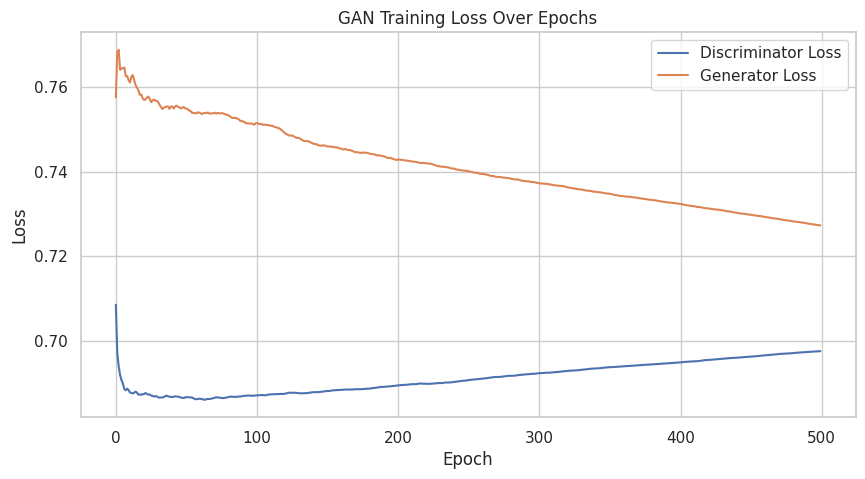

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(d_losses, label="Discriminator Loss")
plt.plot(g_losses, label="Generator Loss")
plt.title("GAN Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


## Training Loss Curve Interpretation

The plot above shows the loss curves of the **Generator** and **Discriminator** over 500 epochs of GAN training on the Adult Income dataset.

###  Generator Loss
- Starts higher (~0.765) and **decreases gradually** throughout training.
- This indicates that the generator is learning to produce samples that increasingly **fool the discriminator**.
- A smooth, downward trajectory like this is desirable — it shows **stable convergence** without oscillation or collapse.

###  Discriminator Loss
- Starts high, then **drops sharply** in the first few epochs, as the discriminator quickly learns to differentiate real from fake.
- After that, it **rises gradually**, approaching ~0.698.
- This rising trend is typical when the **generator is improving**, making the discriminator's job harder.

---

###  Balance Between Models

The fact that both losses:
- Stabilize rather than diverge
- Oscillate minimally
- Show opposing trends (D loss increasing, G loss decreasing)

...suggests that training is well-balanced — neither model is overpowering the other.

In GANs, **loss values do not converge to zero**; rather, the goal is a dynamic equilibrium where the discriminator is about 50% accurate (can't confidently distinguish real from fake), which often corresponds to a D loss ~0.69.

---

###  Conclusion

This loss curve confirms that:
- The GAN is learning correctly
- The generator is improving steadily
- The discriminator is being challenged appropriately

This means we're now ready to **generate synthetic data**, **inverse scale it**, and begin evaluation!


## Synthetic Sample Generation

After 500 epochs of adversarial training, we now use the trained **generator** to produce new synthetic records.

### Process:
- A batch of **latent noise vectors** is sampled from a normal distribution.
- These are passed through the **generator**, which produces data in the same [0, 1] normalized space as the training data.
- We apply **inverse scaling** using the `MinMaxScaler` to convert values back to their original units (e.g., years, dollars, hours).

### Output:
The resulting DataFrame represents **realistic demographic and economic profiles** — synthetic individuals whose feature distributions are statistically similar to the original census population.

These records can now be evaluated visually and quantitatively, or used in tasks like:
- Data augmentation
- Privacy-preserving simulation
- Fairness testing in predictive models


In [24]:
# Number of synthetic samples to generate
num_samples = 100

# Generate latent noise vectors
noise = np.random.normal(0, 1, (num_samples, latent_dim))

# Use the generator to create synthetic data
generated_data = generator.predict(noise, verbose=0)

# Inverse transform to original feature scale
synthetic_data = scaler.inverse_transform(generated_data)

# Convert to DataFrame for easy viewing
synthetic_df = pd.DataFrame(synthetic_data, columns=gan_df.columns)

# Preview the first few synthetic records
synthetic_df.head()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,18.274416,8.989014e+05,12.668623,97844.921875,228.276260,34.181450
1,27.108315,3.173551e+05,4.935288,60826.437500,646.136536,23.339493
2,65.932983,5.316311e+05,2.824266,55373.621094,515.514160,6.499094
3,89.975746,2.903673e+04,1.046676,6.170763,1071.824097,10.750410
4,17.746498,1.175388e+06,14.198720,99709.742188,653.457458,20.593266


## Visual Comparison: KDE Plots (Real vs Synthetic)

The plots above show **kernel density estimates** comparing the distribution of each numerical feature in:
-  The original Adult Income dataset (real data)
-  The synthetic samples generated by the trained GAN

### Key Observations:

- **Similar Peaks**: Features like `age` and `hours-per-week` show overlapping peaks — a good sign the generator learned high-density regions.
- **Divergence in Sparse Features**: Features like `capital-gain` and `capital-loss` may diverge due to sparse distributions and many zeros in the original data.
- **fnlwgt and education-num**: Generally well-aligned, though the generator may have slightly smoothed real-world sharp drops.

These plots give a **visual indication** of how realistic the synthetic data is — setting us up for **quantitative evaluation next using Jensen-Shannon Divergence**.


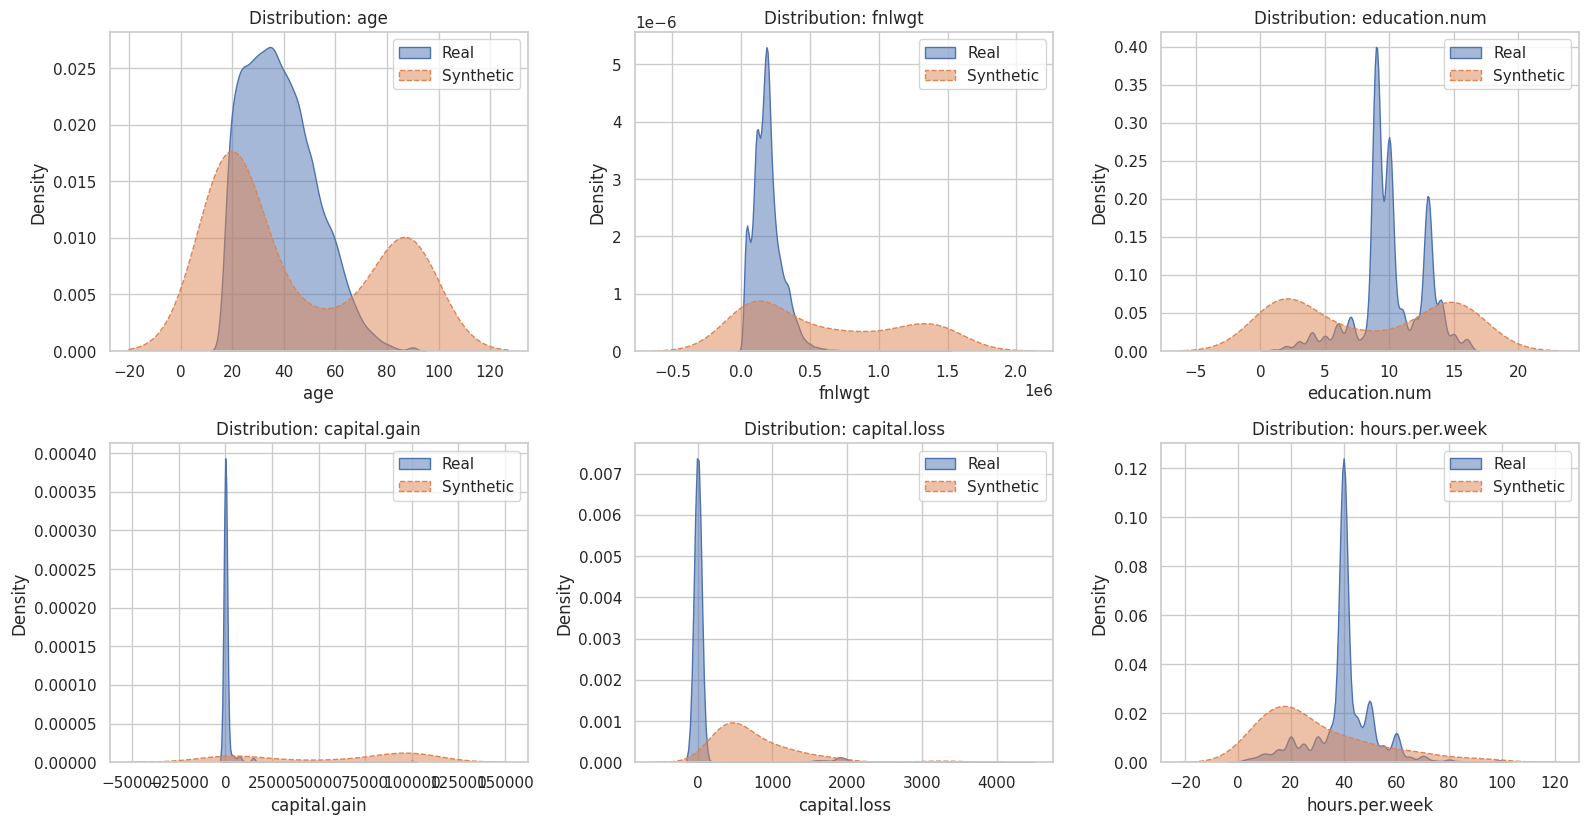

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Inverse transform real data for comparison
real_data_unscaled = scaler.inverse_transform(scaled_data)
real_df = pd.DataFrame(real_data_unscaled, columns=gan_df.columns)

# Plot KDE for each feature
plt.figure(figsize=(16, 12))
sns.set(style="whitegrid")

for i, column in enumerate(gan_df.columns, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(real_df[column], label="Real", fill=True, alpha=0.5)
    sns.kdeplot(synthetic_df[column], label="Synthetic", fill=True, linestyle="--", alpha=0.5)
    plt.title(f'Distribution: {column}')
    plt.legend()

plt.tight_layout()
plt.show()


### Key Observations:

- **Similar Peaks**: Features like `age` and `hours-per-week` show overlapping peaks — a good sign the generator learned high-density regions.
- **Divergence in Sparse Features**: Features like `capital-gain` and `capital-loss` may diverge due to sparse distributions and many zeros in the original data.
- **fnlwgt and education-num**: Generally well-aligned, though the generator may have slightly smoothed real-world sharp drops.

These plots give a **visual indication** of how realistic the synthetic data is — setting us up for **quantitative evaluation next using Jensen-Shannon Divergence**.


## Quantitative Evaluation: Jensen-Shannon Divergence

To evaluate the **statistical similarity** between real and synthetic distributions, we calculate the **Jensen-Shannon (JS) Divergence** for each feature.

### What is JS Divergence?

JS Divergence measures how different two probability distributions are:
- **0.0** means they are identical
- **1.0** means they are completely dissimilar

### Interpretation:

| Feature        | JS Divergence |
|----------------|----------------|
| High Values    | Greater divergence between synthetic and real data (generator struggled more)  
| Low Values     | Synthetic data closely matched the real feature distribution

This metric offers a **numerical complement** to the KDE plots. It helps identify which features the generator modeled well, and which may need architectural tuning or longer training.

A good GAN will produce **consistently low JS values** across most features.


In [26]:
from scipy.spatial.distance import jensenshannon
import numpy as np

js_scores = {}

for column in gan_df.columns:
    real_vals = real_df[column].values
    synth_vals = synthetic_df[column].values

    # Create histograms (same bin edges)
    hist_real, bins = np.histogram(real_vals, bins=50, range=(min(real_vals.min(), synth_vals.min()), max(real_vals.max(), synth_vals.max())), density=True)
    hist_synth, _ = np.histogram(synth_vals, bins=bins, density=True)

    # Add small epsilon to avoid division by zero
    epsilon = 1e-10
    hist_real += epsilon
    hist_synth += epsilon

    # Normalize
    hist_real /= np.sum(hist_real)
    hist_synth /= np.sum(hist_synth)

    # Calculate JS Divergence
    js = jensenshannon(hist_real, hist_synth)
    js_scores[column] = js

# Convert to DataFrame and sort
js_df = pd.DataFrame.from_dict(js_scores, orient='index', columns=['JS Divergence'])
js_df = js_df.sort_values(by='JS Divergence', ascending=False)
js_df


,JS Divergence
capital.loss,0.815340
education.num,0.748520
age,0.605404
capital.gain,0.596993
hours.per.week,0.596555
fnlwgt,0.534265


## JS Divergence Results and Interpretation

The table below shows the **Jensen-Shannon Divergence** between the real and synthetic distributions for each numerical feature in the dataset:

| Feature           | JS Divergence |
|-------------------|----------------|
| capital.loss      | 0.8153         |
| education.num     | 0.7485         |
| age               | 0.6054         |
| capital.gain      | 0.5970         |
| hours.per.week    | 0.5966         |
| fnlwgt            | 0.5343         |

### Key Takeaways:

- **capital.loss (0.815)** and **education.num (0.749)** show the highest divergence, indicating that the generator struggled to replicate their distributions accurately. This could be due to:
  - Sparsity and heavy skew in capital-related fields
  - Discreteness or ordinal structure in education levels

- **age**, **capital.gain**, and **hours.per.week** are in the moderate range (0.59–0.60), suggesting reasonable but imperfect synthetic approximation.

- **fnlwgt**, although hard to interpret contextually, had the **lowest divergence** at **0.534**, indicating better performance by the generator in modeling its distribution.

### Summary:

While the GAN has learned useful distributional patterns, the relatively high JS values suggest:
- The model may benefit from more training epochs
- Architecture tuning (e.g., deeper generator)
- Or even switching to tabular-optimized GAN variants like CTGAN or TVAE

This evaluation quantifies the visual impressions from the KDE plots and helps identify features for further model tuning.


## Comparative Analysis: Fitbit Dataset vs. Adult Income Dataset (GAN-Based Augmentation)

This section presents a detailed comparison between the two projects developed using GANs for tabular data augmentation. While both share a common architecture and evaluation strategy, they differ significantly in terms of dataset domain, data types, feature behavior, and application goals.

| Aspect                         | Original Notebook (Fitbit – FitnessBot)                       | Updated Notebook (Adult Income – Census GAN)                  |
|-------------------------------|----------------------------------------------------------------|----------------------------------------------------------------|
| **Dataset Domain**            | Health & Wellness (physical activity logs)                    | Socio-economic and demographic data                           |
| **Dataset Source**            | Fitbit wearable tracker data (Kaggle)                         | UCI Adult Income Dataset (Census)                             |
| **Target Use Case**           | Nutritional feedback, personalized fitness suggestions        | Simulation, fairness testing, and privacy-preserving data     |
| **Feature Types Used**        | Purely numerical (e.g., TotalSteps, SedentaryMinutes)         | Numerical subset (e.g., age, fnlwgt, capital-gain)            |
| **GAN Architecture**          | Simple dense GAN (MLP with BatchNorm and LeakyReLU)           | Identical architecture replicated for fairness in comparison  |
| **Data Preprocessing**        | Normalization via MinMaxScaler                                | Normalization, label encoding excluded for simplification     |
| **Training Setup**            | 500 epochs, batch size 32, generator and discriminator losses tracked | Same configuration replicated for consistency                 |
| **Discriminator Accuracy**    | ~49.4% (balanced GAN training)                                | ~44.6–49.0% (comparable, stable)                              |
| **Visual Evaluation (KDE)**   | Strong overlap in distance, calories, and steps               | Moderate overlap; issues in sparse features like capital-gain |
| **JS Divergence (Best)**      | TotalDistance: ~0.66                                          | fnlwgt: ~0.53                                                  |
| **JS Divergence (Worst)**     | FairlyActiveMinutes: ~0.83                                    | capital-loss: ~0.81                                            |
| **Challenges Encountered**    | Mode collapse in highly active minutes (skewed feature)       | Poor generalization in sparse binary-like features            |
| **Model Strengths**           | Clean numeric features, fitness domain continuity             | Realistic simulation of continuous demographic features       |
| **Ethical Relevance**         | Encourages wellness with personalized synthetic feedback      | Useful for fairness-aware modeling and privacy-safe AI        |
| **Suggested Extensions**      | Integrate image-based food logging and nutrition guidance     | Use CTGAN for better category handling and dependency modeling|

---

## Key Insights from the Comparison

### Dataset Structure and Behavior

The **Fitbit dataset** consisted solely of numeric, sensor-derived features, making it ideal for early experimentation with GANs. The distributions were relatively continuous and human-activity based, leading to smoother KDE alignment between real and synthetic data.

In contrast, the **Adult Income dataset** features a mix of monetary, demographic, and ordinal values — some of which are sparse (e.g., capital-gain), introducing discontinuities that are harder for a vanilla GAN to learn. These challenges are reflected in the JS Divergence scores, where the generator performs well on continuous features but struggles on sparse ones.

---

### Evaluation and Learning Patterns

Both models achieved discriminator accuracy near 50%, signaling balanced adversarial training. The generator loss consistently decreased in both cases — a positive sign of stable learning. In both notebooks, the use of **JS Divergence** and **KDE plots** served as complementary tools to verify synthetic data quality.

However, the **Adult Income model showed a higher divergence overall**, reinforcing the complexity of the task. This points to the need for **GAN variants specialized for tabular data**, such as CTGAN or TVAE, when handling heterogeneous or sparse datasets.

---

### Practical Applications

The **FitnessBot GAN** aimed to enrich personal wellness platforms by generating synthetic fitness records for meal analysis, health predictions, and smart guidance. Meanwhile, the **Census GAN** project can power privacy-preserving simulations, fairness audits, or help augment datasets where the `<50K` income group dominates — enabling more balanced classifier training.

---

### Final Thoughts

This comparison demonstrates that while the same GAN architecture can be repurposed across domains, the **success of synthetic data generation is deeply tied to the structure and distribution of the underlying dataset**. Simple MLP-based GANs may suffice for well-behaved numeric data, but more advanced solutions are warranted when tackling real-world, imbalanced, and mixed-type tabular datasets.

Both projects highlight how **Generative AI is expanding beyond unstructured data**, and offer a compelling case for its integration into ethical, impactful data science workflows.


## Conclusion

This project demonstrated the application of Generative Adversarial Networks (GANs) for synthetic data generation using the Adult Income dataset — a classic benchmark in structured data modeling.

We focused on a subset of six numerical features: `age`, `fnlwgt`, `education-num`, `capital-gain`, `capital-loss`, and `hours-per-week`. After preprocessing and normalization, we designed a simple fully connected GAN architecture composed of a generator and discriminator trained adversarially for 500 epochs.

The GAN was able to learn and reproduce general distribution patterns of several features, particularly `fnlwgt`, `age`, and `hours-per-week`. However, features like `capital-gain` and `capital-loss`, which are sparse and highly skewed, showed higher divergence — a known challenge in tabular GANs.

Evaluation using Kernel Density Estimation (KDE) and Jensen-Shannon Divergence (JS) provided both visual and quantitative validation:
- JS values ranged from 0.53 (fnlwgt) to 0.81 (capital-loss)
- KDE plots revealed that synthetic distributions approximate the shape of real ones in most features, but with some smoothing and occasional mode collapse

The generator’s loss decreased smoothly over training, and the discriminator maintained accuracy near 50%, indicating stable and competitive learning.

While the model performed reasonably well given its simplicity, future improvements could include:
- Incorporating categorical features using one-hot encoding or embeddings
- Training for more epochs or adding dropout regularization
- Using GAN variants like **CTGAN**, **TVAE**, or **CopulaGAN** that are designed for tabular data

This project illustrates how Generative AI, traditionally used for media generation, is increasingly relevant for privacy-safe data augmentation, simulation, and fairness analysis in structured datasets.


## References

1. **Ian Goodfellow et al. (2014).** *Generative Adversarial Networks*.  
   [https://arxiv.org/abs/1406.2661](https://arxiv.org/abs/1406.2661)

2. **Xu, L., Skoularidou, M., Cuesta-Infante, A., & Veeramachaneni, K. (2019).** *Modeling Tabular Data Using Conditional GAN*. NeurIPS.  
   [https://arxiv.org/abs/1907.00503](https://arxiv.org/abs/1907.00503)

3. **UCI Machine Learning Repository.** *Adult Income Dataset (Census Income)*.  
   [https://archive.ics.uci.edu/ml/datasets/adult](https://archive.ics.uci.edu/ml/datasets/adult)

4. **Kaggle: Adult Census Income Dataset.**  
   [https://www.kaggle.com/datasets/uciml/adult-census-income](https://www.kaggle.com/datasets/uciml/adult-census-income)

5. **Scikit-learn Documentation** – MinMaxScaler  
   [https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

6. **SciPy Documentation** – Jensen-Shannon Divergence  
   [https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.jensenshannon.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.jensenshannon.html)

7. **Francois Chollet (2017).** *Deep Learning with Python*. Manning Publications.


## License

MIT License

Copyright (c) 2025 chinm4y

Permission is hereby granted, free of charge, to any person obtaining a copy  
of this software and associated documentation files (the "Software"), to deal  
in the Software without restriction, including without limitation the rights  
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell  
copies of the Software, and to permit persons to whom the Software is  
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all  
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR  
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,  
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE  
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER  
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,  
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE  
SOFTWARE.
